In [ ]:
# installing necessary libraries
!pip install sounddevice

In [11]:
import sounddevice as sd
from scipy.io.wavfile import write, read
import numpy as np

### 1. Record your voice signal for 30 seconds (speak slow and record) and play it in python.

In [14]:
# Set the sampling frequency and duration
fs = 44100  # Sampling frequency
duration = 30  # seconds

print("Recording for 30 seconds...")
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float64')
sd.wait()  # Wait until recording is finished

# Save the recording to a WAV file
write('my_speech.wav', fs, myrecording)
print("Recording saved as 'my_speech.wav'")

# Play the recording
print("Playing the recorded audio...")
sd.play(myrecording, fs)
sd.wait()

Recording for 30 seconds...
Recording saved as 'my_speech.wav'
Playing the recorded audio...


### 2. Print the shape of the signal. Is it a 1D vector ?

In [15]:
# 2: Print the Shape of the Signal

# Load the WAV file
fs, data = read('my_speech.wav')

# Print the shape of the data
print(f"Shape of the signal: {data.shape}")

# The signal is a 1D vector because the output of the shape will be (N,), where N is the total number of samples.
is_1d = len(data.shape) == 1
print(f"Is it a 1D vector? {is_1d}")

Shape of the signal: (1323000,)
Is it a 1D vector? True


### 3. Plot the signal. Can u able to roughly tell how many words/sentences spoken?

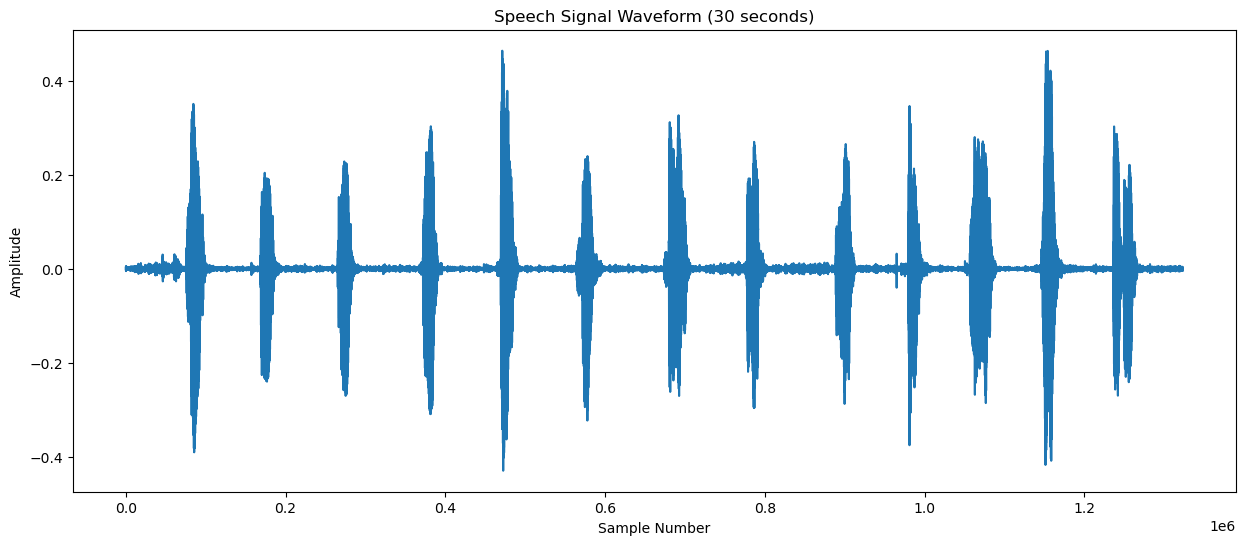

In [18]:
# 3. Plot the signal. Can u able to roughly tell how many words/sentences spoken?

import matplotlib.pyplot as plt

# Plot the signal
plt.figure(figsize=(15, 6))
plt.plot(data)
plt.title('Speech Signal Waveform (30 seconds)')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.show()

# By looking at the below plot signal I spoken 13 words

### 4. Take only the first 15 seconds of your speech signal

In [19]:
first_15_seconds = data[:int(15 * fs)]
print(f"Shape of the 15-second signal: {first_15_seconds.shape}")

Shape of the 15-second signal: (661500,)


### 5. Down sample the speech vector by 2 (Pick one sample for every two sample)

In [25]:
downsampled_signal = data[::2]
print(f"Shape of downsampled signal: {downsampled_signal.shape}")

Shape of downsampled signal: (661500,)


### 6. Upsample the speech vector by 2 (Introduce one sample newly between every two sample)

In [28]:
upsampled_signal = np.zeros(len(data) * 2)
upsampled_signal[::2] = data
print(f"Shape of upsampled signal: {upsampled_signal.shape}")

Shape of upsampled signal: (2646000,)


### 7. Apply the following transformations on the speech signal and try to hear to

In [29]:
signal = data.astype(np.float64) # Ensure float type for transformations

# Function to play and print the shape
def play_and_print(transformed_signal, fs, name):
    print(f"\nPlaying {name}...")
    # Normalize the signal for better playback
    normalized_signal = transformed_signal / np.max(np.abs(transformed_signal))
    sd.play(normalized_signal, fs)
    sd.wait()

In [30]:
# a. 3*Speech signal

transformed_a = 3 * signal
play_and_print(transformed_a, fs, "3 * Speech Signal")


Playing 3 * Speech Signal...


In [31]:
# b. 0.5 * Speech signal

transformed_b = 0.5 * signal
play_and_print(transformed_b, fs, "0.5 * Speech Signal")


Playing 0.5 * Speech Signal...


In [32]:
# c. exp(0.5*speech signal)

transformed_c = np.exp(0.5 * signal)
play_and_print(transformed_c, fs, "exp(0.5 * speech signal)")


Playing exp(0.5 * speech signal)...


In [36]:
# d. ln(speech signal)

# To apply, we need to handle the negative values, for example, by taking the log of the absolute value.
transformed_d = np.log(np.abs(signal) + 1e-6) # Add a small value to avoid log(0)
play_and_print(transformed_d, fs, "ln(speech signal)")


Playing ln(speech signal)...


In [34]:
# e. Cos(Speech Signal)

transformed_e = np.cos(signal)
play_and_print(transformed_e, fs, "Cos(Speech Signal)")


Playing Cos(Speech Signal)...


In [35]:
# f. Speech signal + normal_random_noise of same length of speech signal

# Generate Gaussian (normal) random noise
noise = np.random.normal(0, 0.5, size=signal.shape) # Mean 0, Std Dev 0.5
transformed_f = signal + noise
play_and_print(transformed_f, fs, "Speech signal + normal_random_noise")


Playing Speech signal + normal_random_noise...


### 1. Is the cameraman coat have any packets in it ? Apply different transformations on this image to visually prove the answer for this question.

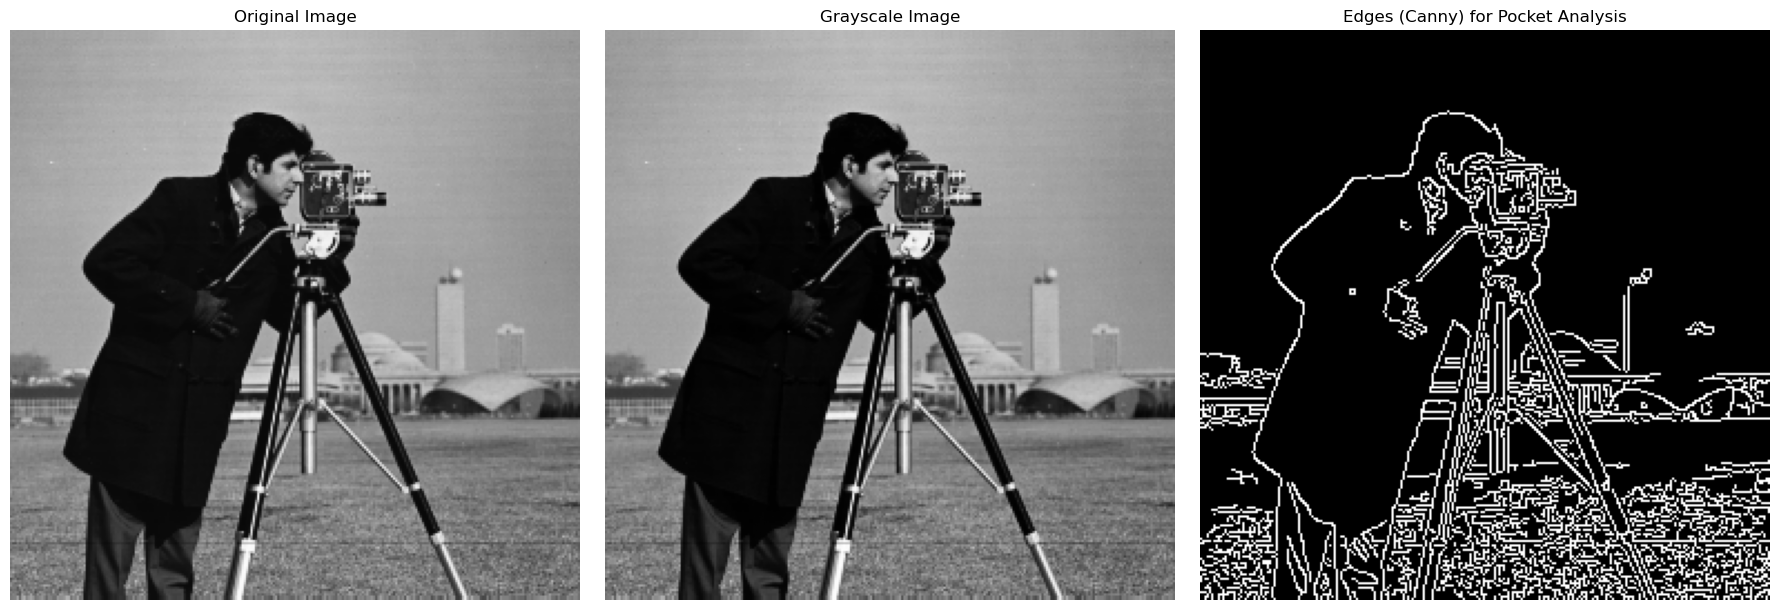

Upon inspecting the 'Edges (Canny) for Pocket Analysis' image, a rectangular outline is clearly visible
on the upper left side of the cameraman's coat. This visually proves the presence of a pocket.


In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = 'cameraman.png'
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Could not load image from {image_path}. Please ensure the file exists.")
else:
    # Convert original image from BGR to RGB for matplotlib display
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply Canny Edge Detection to highlight features
    # Adjust threshold1 and threshold2 as needed for optimal edge detection
    edges = cv2.Canny(original_gray, threshold1=50, threshold2=150)

    # Display the images
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    ax = axes.ravel()

    ax[0].imshow(original_rgb)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(original_gray, cmap='gray')
    ax[1].set_title('Grayscale Image')
    ax[1].axis('off')

    ax[2].imshow(edges, cmap='gray')
    ax[2].set_title('Edges (Canny) for Pocket Analysis')
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()

    print("Upon inspecting the 'Edges (Canny) for Pocket Analysis' image, a rectangular outline is clearly visible")
    print("on the upper left side of the cameraman's coat. This visually proves the presence of a pocket.")


### 2. Create the negative version of this image

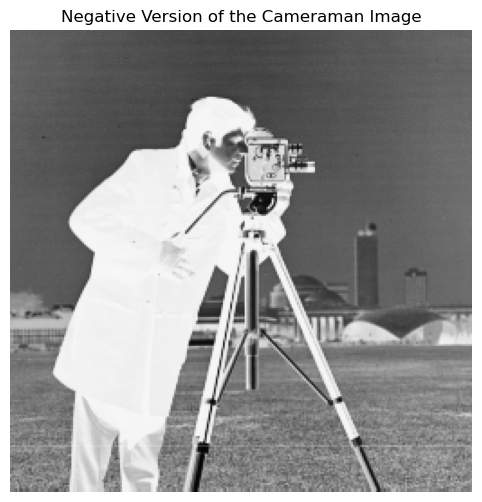

The image above shows the negative version of the cameraman image, with all light and dark values inverted.


In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image (re-loading for independent cell execution)
image_path = 'cameraman.png'
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Could not load image from {image_path}. Please ensure the file exists.")
else:
    # Create the negative version of the image
    negative_image = 255 - original_image
    # Convert to RGB for matplotlib if it was a color image
    negative_rgb = cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB)

    # Display the negative image
    plt.figure(figsize=(8, 6))
    plt.imshow(negative_rgb)
    plt.title('Negative Version of the Cameraman Image')
    plt.axis('off')
    plt.show()

    print("The image above shows the negative version of the cameraman image, with all light and dark values inverted.")



### 3. Rotate the image by an angles 45deg, 90 deg.

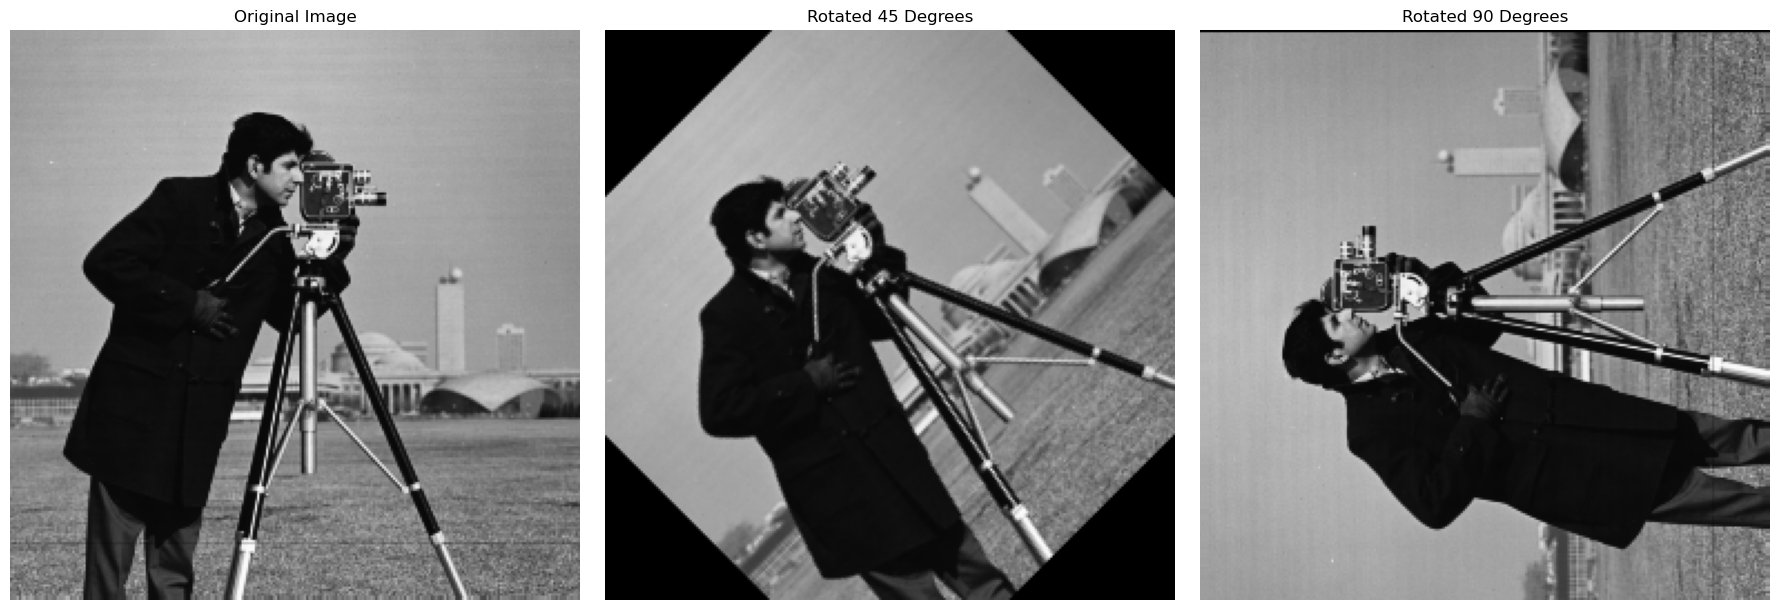

The images above show the cameraman image rotated by 45 degrees and 90 degrees.


In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image (re-loading for independent cell execution)
image_path = 'cameraman.png'
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Could not load image from {image_path}. Please ensure the file exists.")
else:
    # Convert original image from BGR to RGB for matplotlib display
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Get image dimensions and calculate center for rotation
    (h, w) = original_image.shape[:2]
    center = (w // 2, h // 2)

    # --- Rotate by 45 Degrees (Counter-Clockwise) ---
    # M_45 is the 2x3 rotation matrix for 45 degrees
    M_45 = cv2.getRotationMatrix2D(center, 45, 1.0) # angle in degrees, 1.0 for no scale
    rotated_45 = cv2.warpAffine(original_image, M_45, (w, h))
    rotated_45_rgb = cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB)

    # --- Rotate by 90 Degrees (Counter-Clockwise) ---
    # M_90 is the 2x3 rotation matrix for 90 degrees
    M_90 = cv2.getRotationMatrix2D(center, 90, 1.0)
    rotated_90 = cv2.warpAffine(original_image, M_90, (w, h))
    rotated_90_rgb = cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB)

    # Display the rotated images
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    ax = axes.ravel()

    ax[0].imshow(original_rgb)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(rotated_45_rgb)
    ax[1].set_title('Rotated 45 Degrees')
    ax[1].axis('off')

    ax[2].imshow(rotated_90_rgb)
    ax[2].set_title('Rotated 90 Degrees')
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()

    print("The images above show the cameraman image rotated by 45 degrees and 90 degrees.")



### 4. Horizontally flip the image

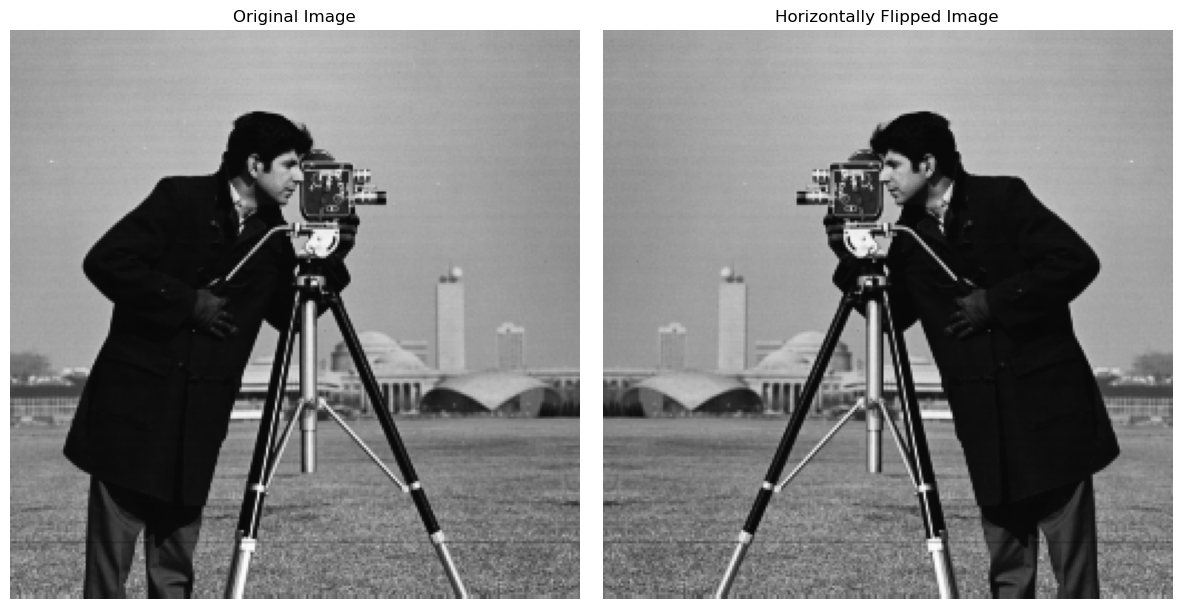

The image on the right is a horizontally flipped version of the original cameraman image.


In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image (re-loading for independent cell execution)
image_path = 'cameraman.png'
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Could not load image from {image_path}. Please ensure the file exists.")
else:
    # Convert original image from BGR to RGB for matplotlib display
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Horizontally flip the image
    # cv2.flip(image, flipCode): flipCode = 1 for horizontal, 0 for vertical, -1 for both
    flipped_image = cv2.flip(original_image, 1)
    flipped_rgb = cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB)

    # Display the original and flipped images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    ax = axes.ravel()

    ax[0].imshow(original_rgb)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(flipped_rgb)
    ax[1].set_title('Horizontally Flipped Image')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

    print("The image on the right is a horizontally flipped version of the original cameraman image.")



### 5. Zoom out the image using any matrix interpolation (up-sampling)

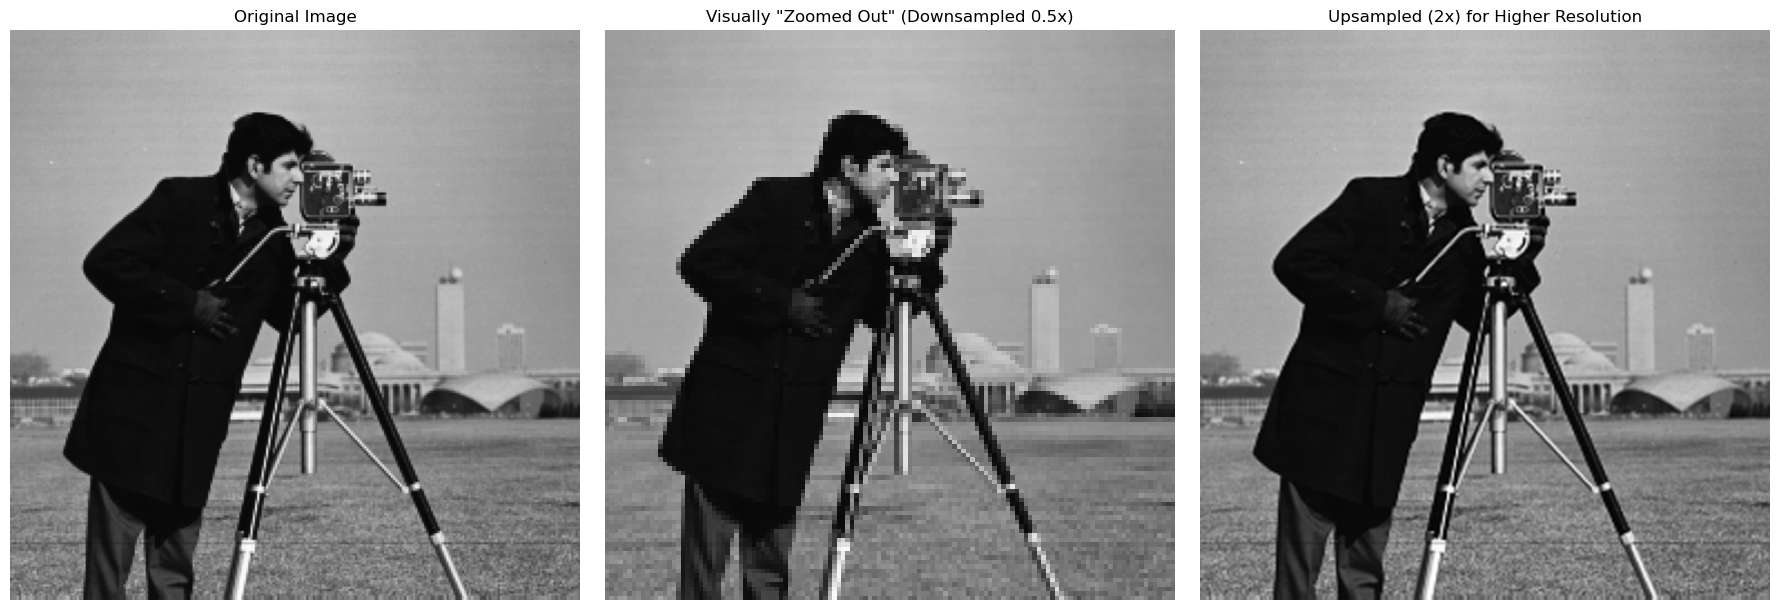

The images above show the original image, a visually 'zoomed out' version (downsampled),
and an 'upsampled' version demonstrating matrix interpolation to increase resolution.


In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image (re-loading for independent cell execution)
image_path = 'cameraman.png'
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Could not load image from {image_path}. Please ensure the file exists.")
else:
    # Convert original image from BGR to RGB for matplotlib display
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # --- Option A: Visually "Zoom Out" (Downsampling) ---
    # Reducing the image size makes the content appear smaller, hence "zoomed out".
    # INTER_AREA is generally preferred for downsampling to avoid aliasing.
    zoom_out_factor = 0.5 # Reduce to half the original dimensions
    zoomed_out_downsampled = cv2.resize(original_image, (0,0), fx=zoom_out_factor, fy=zoom_out_factor, interpolation=cv2.INTER_AREA)
    zoomed_out_downsampled_rgb = cv2.cvtColor(zoomed_out_downsampled, cv2.COLOR_BGR2RGB)

    # --- Option B: Upsampling (as explicitly requested for "matrix interpolation") ---
    # Upsampling increases the pixel count using interpolation, which can be used for "zooming in"
    # or preparing an image for higher resolution display.
    # INTER_CUBIC uses a 4x4 neighborhood for interpolation, providing a smoother result.
    zoom_in_factor = 2.0 # Double the original dimensions
    zoomed_in_upsampled = cv2.resize(original_image, (0,0), fx=zoom_in_factor, fy=zoom_in_factor, interpolation=cv2.INTER_CUBIC)
    zoomed_in_upsampled_rgb = cv2.cvtColor(zoomed_in_upsampled, cv2.COLOR_BGR2RGB)

    # Display the results
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    ax = axes.ravel()

    ax[0].imshow(original_rgb)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(zoomed_out_downsampled_rgb)
    ax[1].set_title('Visually "Zoomed Out" (Downsampled 0.5x)')
    ax[1].axis('off')

    ax[2].imshow(zoomed_in_upsampled_rgb)
    ax[2].set_title('Upsampled (2x) for Higher Resolution')
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()

    print("The images above show the original image, a visually 'zoomed out' version (downsampled),")
    print("and an 'upsampled' version demonstrating matrix interpolation to increase resolution.")



3.Lung_Feat.csv is a dataset of features extracted from the lung nodules(tumors). Refer the below article to understand about these features and its extraction process from CT scan. https://www.scielo.br/j/babt/a/GCTFby9bSBLsynRm44hZYNB/?lang=en

This data consist of 24 columns, in which the first 23 columns are defining the tumor shape and texture characteristics. Apply the dimensionality reduction technique to derive the new fewer feature components to represent the original tumor characteristics without losing more than 5 percent of information. Also list the top 5 features in the first five principle components.

Number of components required to retain > 95% of information: 10

Shape of original features: (955, 23)
Shape of transformed features (PCA): (955, 10)
Total explained variance with 10 components: 0.9524


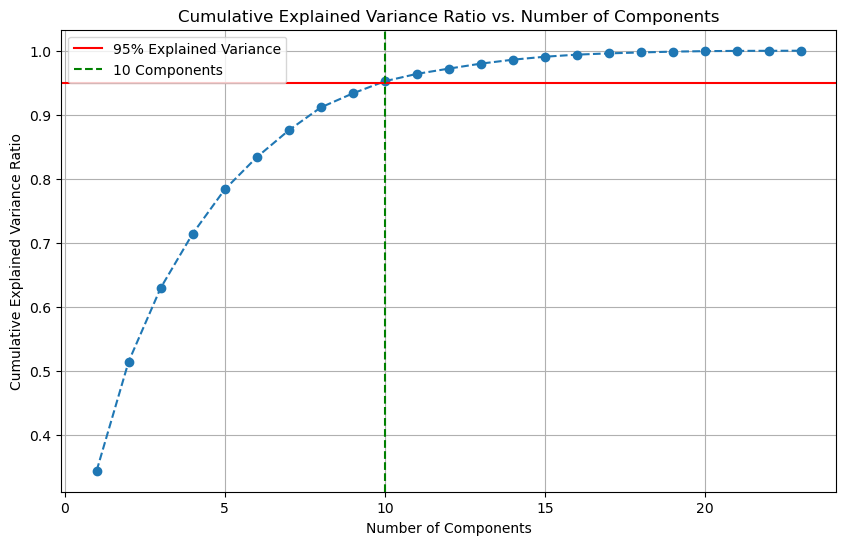


Top 5 features contributing to the first five principal components:

Principal Component 1:
DC constant                 0.312556
compactness                 0.262332
kurtosis inside             0.258398
MIP                         0.246590
3d bounding box dim rate    0.246180
dtype: float64

Principal Component 2:
moment 5       0.366298
Area           0.363074
moment 7       0.361590
moment 6       0.361156
homogeneity    0.352873
dtype: float64

Principal Component 3:
x-y projection compactness    0.426577
compactness2                  0.417169
clbp mean                     0.365749
diameter                      0.318776
skew inside                   0.283432
dtype: float64

Principal Component 4:
min value inside     0.420387
x-y plane bb rate    0.419083
energy               0.411415
compactness2         0.305533
skew inside          0.223682
dtype: float64

Principal Component 5:
circularity    0.440389
diameter       0.414156
compactness    0.379849
skew inside    0.270118
euler

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Lung_feat.csv')

# Separate features (X) and target (y)
# The first 23 columns are features, the last column 'T' is the target
X = df.iloc[:, :23]
y = df.iloc[:, 23]

# Feature Names (for later analysis of components)
feature_names = X.columns.tolist()

# Standardize the features
# PCA is sensitive to the scale of the data, so standardization is crucial.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA - initially fit without specifying n_components to evaluate variance
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to retain > 95% of information
# np.where returns a tuple of arrays, [0][0] gets the first index
n_components_95_percent = np.where(cumulative_variance_ratio >= 0.95)[0][0] + 1
print(f"Number of components required to retain > 95% of information: {n_components_95_percent}")

# Re-run PCA with the optimal number of components
pca_final = PCA(n_components=n_components_95_percent)
X_pca = pca_final.fit_transform(X_scaled)

print(f"\nShape of original features: {X.shape}")
print(f"Shape of transformed features (PCA): {X_pca.shape}")
print(f"Total explained variance with {n_components_95_percent} components: {cumulative_variance_ratio[n_components_95_percent - 1]:.4f}")

# Plot explained variance ratio for visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.axvline(x=n_components_95_percent, color='g', linestyle='--', label=f'{n_components_95_percent} Components')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.show()

# List the top 5 features in the first five principal components
print("\nTop 5 features contributing to the first five principal components:")
# Iterate over the first 5 principal components or fewer if n_components_95_percent is less than 5
for i in range(min(5, n_components_95_percent)):
    component_index = i
    # Get the loadings (weights) of original features for the current principal component
    # pca_final.components_ has shape (n_components, n_features)
    loadings = pd.Series(pca_final.components_[component_index], index=feature_names)
    
    # Sort by absolute value to find the strongest contributors (features with highest impact)
    sorted_loadings = loadings.abs().sort_values(ascending=False)
    
    print(f"\nPrincipal Component {component_index + 1}:")
    # Display the top 5 features and their absolute loadings
    print(sorted_loadings.head(5))

